In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
# Files opening
path = "./data/"
trainingSetValues = pd.read_csv(path + "TrainingSetValues.csv", sep=",")
trainingSetLabels = pd.read_csv(path + "TrainingSetLabels.csv", sep=",")
testSetValues = pd.read_csv(path + "TestSetValues.csv", sep=",")


In [3]:
#testSetValues.head()
print(testSetValues.columns)

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')


In [4]:
trainingSetLabels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [5]:
# Converting columns in the good dtype
def changeDtypes(data):
    for column in data:
        if "date" in column:
                data[column] = pd.to_datetime(data[column], format="%Y/%m/%d")
        else:
            if data[column].dtype == "object":
                data[column] = pd.Categorical(data[column])

changeDtypes(trainingSetValues)
changeDtypes(testSetValues)


In [6]:
# List number of NaN values in data
def get_nan_count(column):
    '''
    column - the column for which we want the NaN value count.
    This function returns the number of NaN values in a specific column.
    '''
    nan_count = column.isnull().sum()
    return nan_count

def list_nb_nan_columns(data):
    for column in data:
        nb = get_nan_count(data[column])
        if nb != 0:
            totalCol = data[column].count() + nb
            print(column,":", round(nb/totalCol *100 ,3), "%")
        
        
print("\nNaN data in trainingSetValues")
list_nb_nan_columns(trainingSetValues)
print("\nNaN data in testSetValues")
list_nb_nan_columns(testSetValues)


NaN data in trainingSetValues
funder : 6.12 %
installer : 6.153 %
subvillage : 0.625 %
public_meeting : 5.613 %
scheme_management : 6.527 %
scheme_name : 47.418 %
permit : 5.145 %

NaN data in testSetValues
funder : 5.852 %
installer : 5.906 %
subvillage : 0.667 %
public_meeting : 5.529 %
scheme_management : 6.525 %
scheme_name : 47.758 %
permit : 4.963 %


functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64


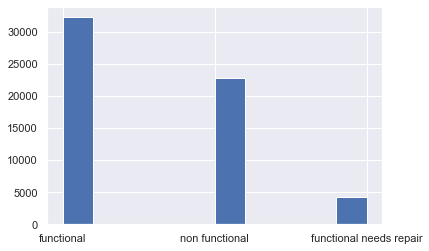

In [7]:
# Functional state
print(trainingSetLabels['status_group'].value_counts())
trainingSetLabels['status_group'].hist()
plt.show()

In [8]:
# amount_tsh
print(trainingSetValues['amount_tsh'].value_counts())
print(testSetValues['amount_tsh'].value_counts())
# Delete amount_tsh from both data sets because of too many '0' values
trainingSetValues.drop(['amount_tsh'], axis = 1, inplace = True)
testSetValues.drop(['amount_tsh'], axis = 1, inplace = True)

0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
250000.0        1
220.0           1
350000.0        1
138000.0        1
38000.0         1
Name: amount_tsh, Length: 98, dtype: int64
0.0         10410
500.0         772
50.0          631
1000.0        370
20.0          349
            ...  
100000.0        1
60000.0         1
2550.0          1
3500.0          1
350.0           1
Name: amount_tsh, Length: 68, dtype: int64


In [9]:
# date_recorded
print(trainingSetValues['date_recorded'].dt.year.value_counts())
print(testSetValues['date_recorded'].dt.year.value_counts())
# Deleting
del trainingSetValues['date_recorded']
del testSetValues['date_recorded']

2011    28674
2013    24271
2012     6424
2004       30
2002        1
Name: date_recorded, dtype: int64
2011    7234
2013    5939
2012    1665
2004      11
2001       1
Name: date_recorded, dtype: int64


In [10]:
# funder
# Replace missing values with the most frequent funder
trainingSetValues['funder'] = trainingSetValues['funder'].fillna(trainingSetValues['funder'].value_counts().index[0])
testSetValues['funder'] = testSetValues['funder'].fillna(testSetValues['funder'].value_counts().index[0])
print(trainingSetValues['funder'].value_counts())
print(testSetValues['funder'].value_counts())

Government Of Tanzania    12719
Danida                     3114
Hesawa                     2202
Rwssp                      1374
World Bank                 1349
                          ...  
Malola                        1
Maliasili                     1
Males                         1
Makusa                        1
Zingibali Secondary           1
Name: funder, Length: 1897, dtype: int64
Government Of Tanzania    3084
Danida                     793
Hesawa                     580
World Bank                 352
Kkkt                       336
                          ... 
Matyenye                     1
Maxavella                    1
Mboma                        1
Mbozi District Council       1
Zara Camp                    1
Name: funder, Length: 980, dtype: int64


In [11]:
# gps_height
print(trainingSetValues['gps_height'].max())
print(trainingSetValues['gps_height'].min())
print(trainingSetValues['gps_height'].mean())
print(trainingSetValues['gps_height'].value_counts())

# Replacing all 0 values by the mean
#trainingSetValues['gps_height'].replace(0, trainingSetValues['gps_height'].mean(), inplace=True)
#testSetValues['gps_height'].replace(0, testSetValues['gps_height'].mean(), inplace=True)

# Do not work yet : Replacing 0 values in gps_height with average of others which are in the same district
#for i in range(trainingSetValues.shape[0]):
#    if trainingSetValues['gps_height'].iloc[i] == 0:
#        district_i = trainingSetValues['district_code'].iloc[i]
#        sum = 0
#        nb = 0
#        for j in range(trainingSetValues.shape[0]):
 #           if i != j and district_i == trainingSetValues['district_code'].iloc[j]:
 #               sum += trainingSetValues['gps_height'].iloc[j]
 #               nb += 1
 #       trainingSetValues['gps_height'].iloc[i] = sum / nb

2770
-90
668.297239057239
 0       20438
-15         60
-16         55
-13         55
 1290       52
         ...  
 2332        1
 2202        1
 2236        1
-57          1
 2038        1
Name: gps_height, Length: 2428, dtype: int64


In [12]:
# installer
trainingSetValues['installer'].value_counts()
# Replace missing values with the most frequent installer
trainingSetValues['installer'] = trainingSetValues['installer'].fillna(trainingSetValues['installer'].value_counts().index[0])
testSetValues['installer'] = testSetValues['installer'].fillna(testSetValues['installer'].value_counts().index[0])
print(trainingSetValues['installer'].value_counts())
print(testSetValues['installer'].value_counts())

DWE                 21057
Government           1825
RWE                  1206
Commu                1060
DANIDA               1050
                    ...  
MH Kapuya               1
METHODIST CHURCH        1
MECO                    1
MBUZI MAWE              1
world vision            1
Name: installer, Length: 2145, dtype: int64
DWE                              5226
Government                        457
RWE                               292
Commu                             287
DANIDA                            255
                                 ... 
Africa Muslum Agence Tanzania       1
MWS                                 1
Machibya                            1
Magati                              1
world                               1
Name: installer, Length: 1091, dtype: int64


In [13]:
# longitude and latitude
print(trainingSetValues['latitude'].value_counts())
print(trainingSetValues['longitude'].value_counts())

-2.000000e-08    1812
-2.494546e+00       2
-6.983183e+00       2
-7.056923e+00       2
-7.056372e+00       2
                 ... 
-6.162973e+00       1
-1.595138e+00       1
-2.007878e+00       1
-6.787691e+00       1
-1.077290e+01       1
Name: latitude, Length: 57517, dtype: int64
0.000000     1812
32.977191       2
32.919861       2
37.542785       2
39.105307       2
             ... 
37.141893       1
35.839879       1
33.638301       1
35.347266       1
35.164770       1
Name: longitude, Length: 57516, dtype: int64


In [14]:
# wpt_name deletion
del trainingSetValues["wpt_name"]
del testSetValues["wpt_name"]

In [15]:
# num_private deletion 
del trainingSetValues['num_private']
del testSetValues['num_private']

In [16]:
# Deletion of basin, subvillage, region, lga and ward
del trainingSetValues['basin']
del testSetValues['basin']
del trainingSetValues['subvillage']
del testSetValues['subvillage']
del trainingSetValues['region']
del testSetValues['region']
del trainingSetValues['lga']
del testSetValues['lga']
del trainingSetValues['ward']
del testSetValues['ward']

In [17]:
# For geographic location we just keep region_code and district_code
# region_code
print(trainingSetValues['region_code'].value_counts())   
# district_code
print(trainingSetValues['district_code'].value_counts())  


11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64
1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64


0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
1160        1
3241        1
1960        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64
0       5453
1       1757
150      436
200      430
250      406
        ... 
2530       1
467        1
451        1
4521       1
1735       1
Name: population, Length: 637, dtype: int64


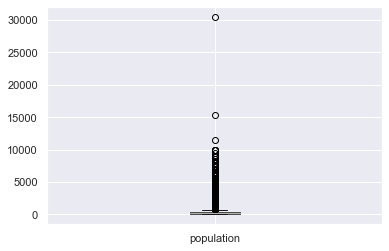

count     9397.000000
mean       290.954134
std        563.265359
min          1.000000
25%         40.000000
50%        150.000000
75%        350.000000
max      11469.000000
Name: population, dtype: float64


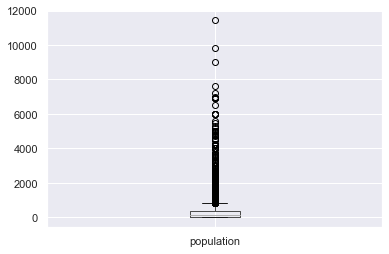

In [18]:
# population

print(trainingSetValues['population'].value_counts())
print(testSetValues['population'].value_counts())
# boxplot excluding 0
trainingSetValues[trainingSetValues['population'] != 0].boxplot(column=['population'])
plt.show()
print(testSetValues['population'][testSetValues['population'] != 0].describe())
testSetValues[testSetValues['population'] != 0].boxplot(column=['population'])
plt.show()

# Replacing 0 by the median
median = trainingSetValues['population'][trainingSetValues['population'] != 0].median
trainingSetValues['population'] = trainingSetValues['population'].replace(0, median)
median = testSetValues['population'][testSetValues['population'] != 0].median
testSetValues['population'] = testSetValues['population'].replace(0, median)


In [20]:
# public meeting
print(trainingSetValues['public_meeting'].value_counts())
print(testSetValues['public_meeting'].value_counts())
# replacing missing values by True
trainingSetValues['public_meeting'] = trainingSetValues['public_meeting'].fillna(True)
testSetValues['public_meeting'] = testSetValues['public_meeting'].fillna(True)

True     51011
False     5055
Name: public_meeting, dtype: int64
True     12738
False     1291
Name: public_meeting, dtype: int64


In [21]:
# recorded_by deletion 
del trainingSetValues['recorded_by']
del testSetValues['recorded_by']